In [1]:
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import glob

import warnings
warnings.filterwarnings('ignore')

## Dataset Download

In [2]:
comp_name = 'predict-west-nile-virus'
path = Path(f'/home/harish3110/Desktop/kaggle/{comp_name}')
path.mkdir(exist_ok=True)

dset_path = (path/'input')
dset_path.mkdir(exist_ok=True)

In [3]:
%cd {dset_path}
# !kaggle competitions download -c {comp_name}
# !unzip -qq {comp_name + '.zip'} 
# !rm {comp_name + '.zip'} 

/home/harish3110/Desktop/kaggle/predict-west-nile-virus/input


In [4]:
# zips = glob.glob("*.zip")

# for f in zips:
#     !unzip -qq {f} 
#     !rm {f}
# print('Unzipped dataset and files.')

In [5]:
!ls

__MACOSX					  spray.csv
mapdata_copyright_openstreetmap_contributors.rds  test.csv
mapdata_copyright_openstreetmap_contributors.txt  train.csv
noaa_weather_qclcd_documentation.pdf		  weather.csv
sampleSubmission.csv				  west_nile


## Data Gathering

In [6]:
dep_var = 'WnvPresent'

In [7]:
dset_path = Path(f'/home/harish3110/Desktop/kaggle/{comp_name}/input')

train = pd.read_csv(f'{dset_path}/train.csv')
test = pd.read_csv(f'{dset_path}/test.csv')
weather = pd.read_csv(f'{dset_path}/weather.csv')
spray = pd.read_csv(f'{dset_path}/spray.csv')

ss = pd.read_csv(f'{dset_path}/sampleSubmission.csv')

In [8]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [9]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [10]:
weather.T

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
Station,1,2,1,2,1,2,1,2,1,2,...,1,2,1,2,1,2,1,2,1,2
Date,2007-05-01,2007-05-01,2007-05-02,2007-05-02,2007-05-03,2007-05-03,2007-05-04,2007-05-04,2007-05-05,2007-05-05,...,2014-10-27,2014-10-27,2014-10-28,2014-10-28,2014-10-29,2014-10-29,2014-10-30,2014-10-30,2014-10-31,2014-10-31
Tmax,83,84,59,60,66,67,66,78,66,66,...,77,79,68,66,49,49,51,53,47,49
Tmin,50,52,42,43,46,48,49,51,53,54,...,51,54,45,48,36,40,32,37,33,34
Tavg,67,68,51,52,56,58,58,M,60,60,...,64,67,57,57,43,45,42,45,40,42
Depart,14,M,-3,M,2,M,4,M,5,M,...,16,M,10,M,-4,M,-4,M,-6,M
DewPoint,51,51,42,42,40,40,41,42,38,39,...,51,52,38,40,32,34,34,35,25,29
WetBulb,56,57,47,47,48,50,50,50,49,50,...,58,59,47,48,40,42,40,42,33,36
Heat,0,0,14,13,9,7,7,M,5,5,...,1,0,8,8,22,20,23,20,25,23
Cool,2,3,0,0,0,0,0,M,0,0,...,0,2,0,0,0,0,0,0,0,0


In [11]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [12]:
ss.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## Basic EDA

In [13]:
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')

In [14]:
train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
Station                   0
Tmax                      0
Tmin                      0
Tavg                      0
Depart                    0
DewPoint                  0
WetBulb                   0
Heat                      0
Cool                      0
Sunrise                   0
Sunset                    0
CodeSum                   0
Depth                     0
Water1                    0
SnowFall                  0
PrecipTotal               0
StnPressure               0
SeaLevel                  0
ResultSpeed               0
ResultDir                 0
AvgSpeed                  0
dtype: int64

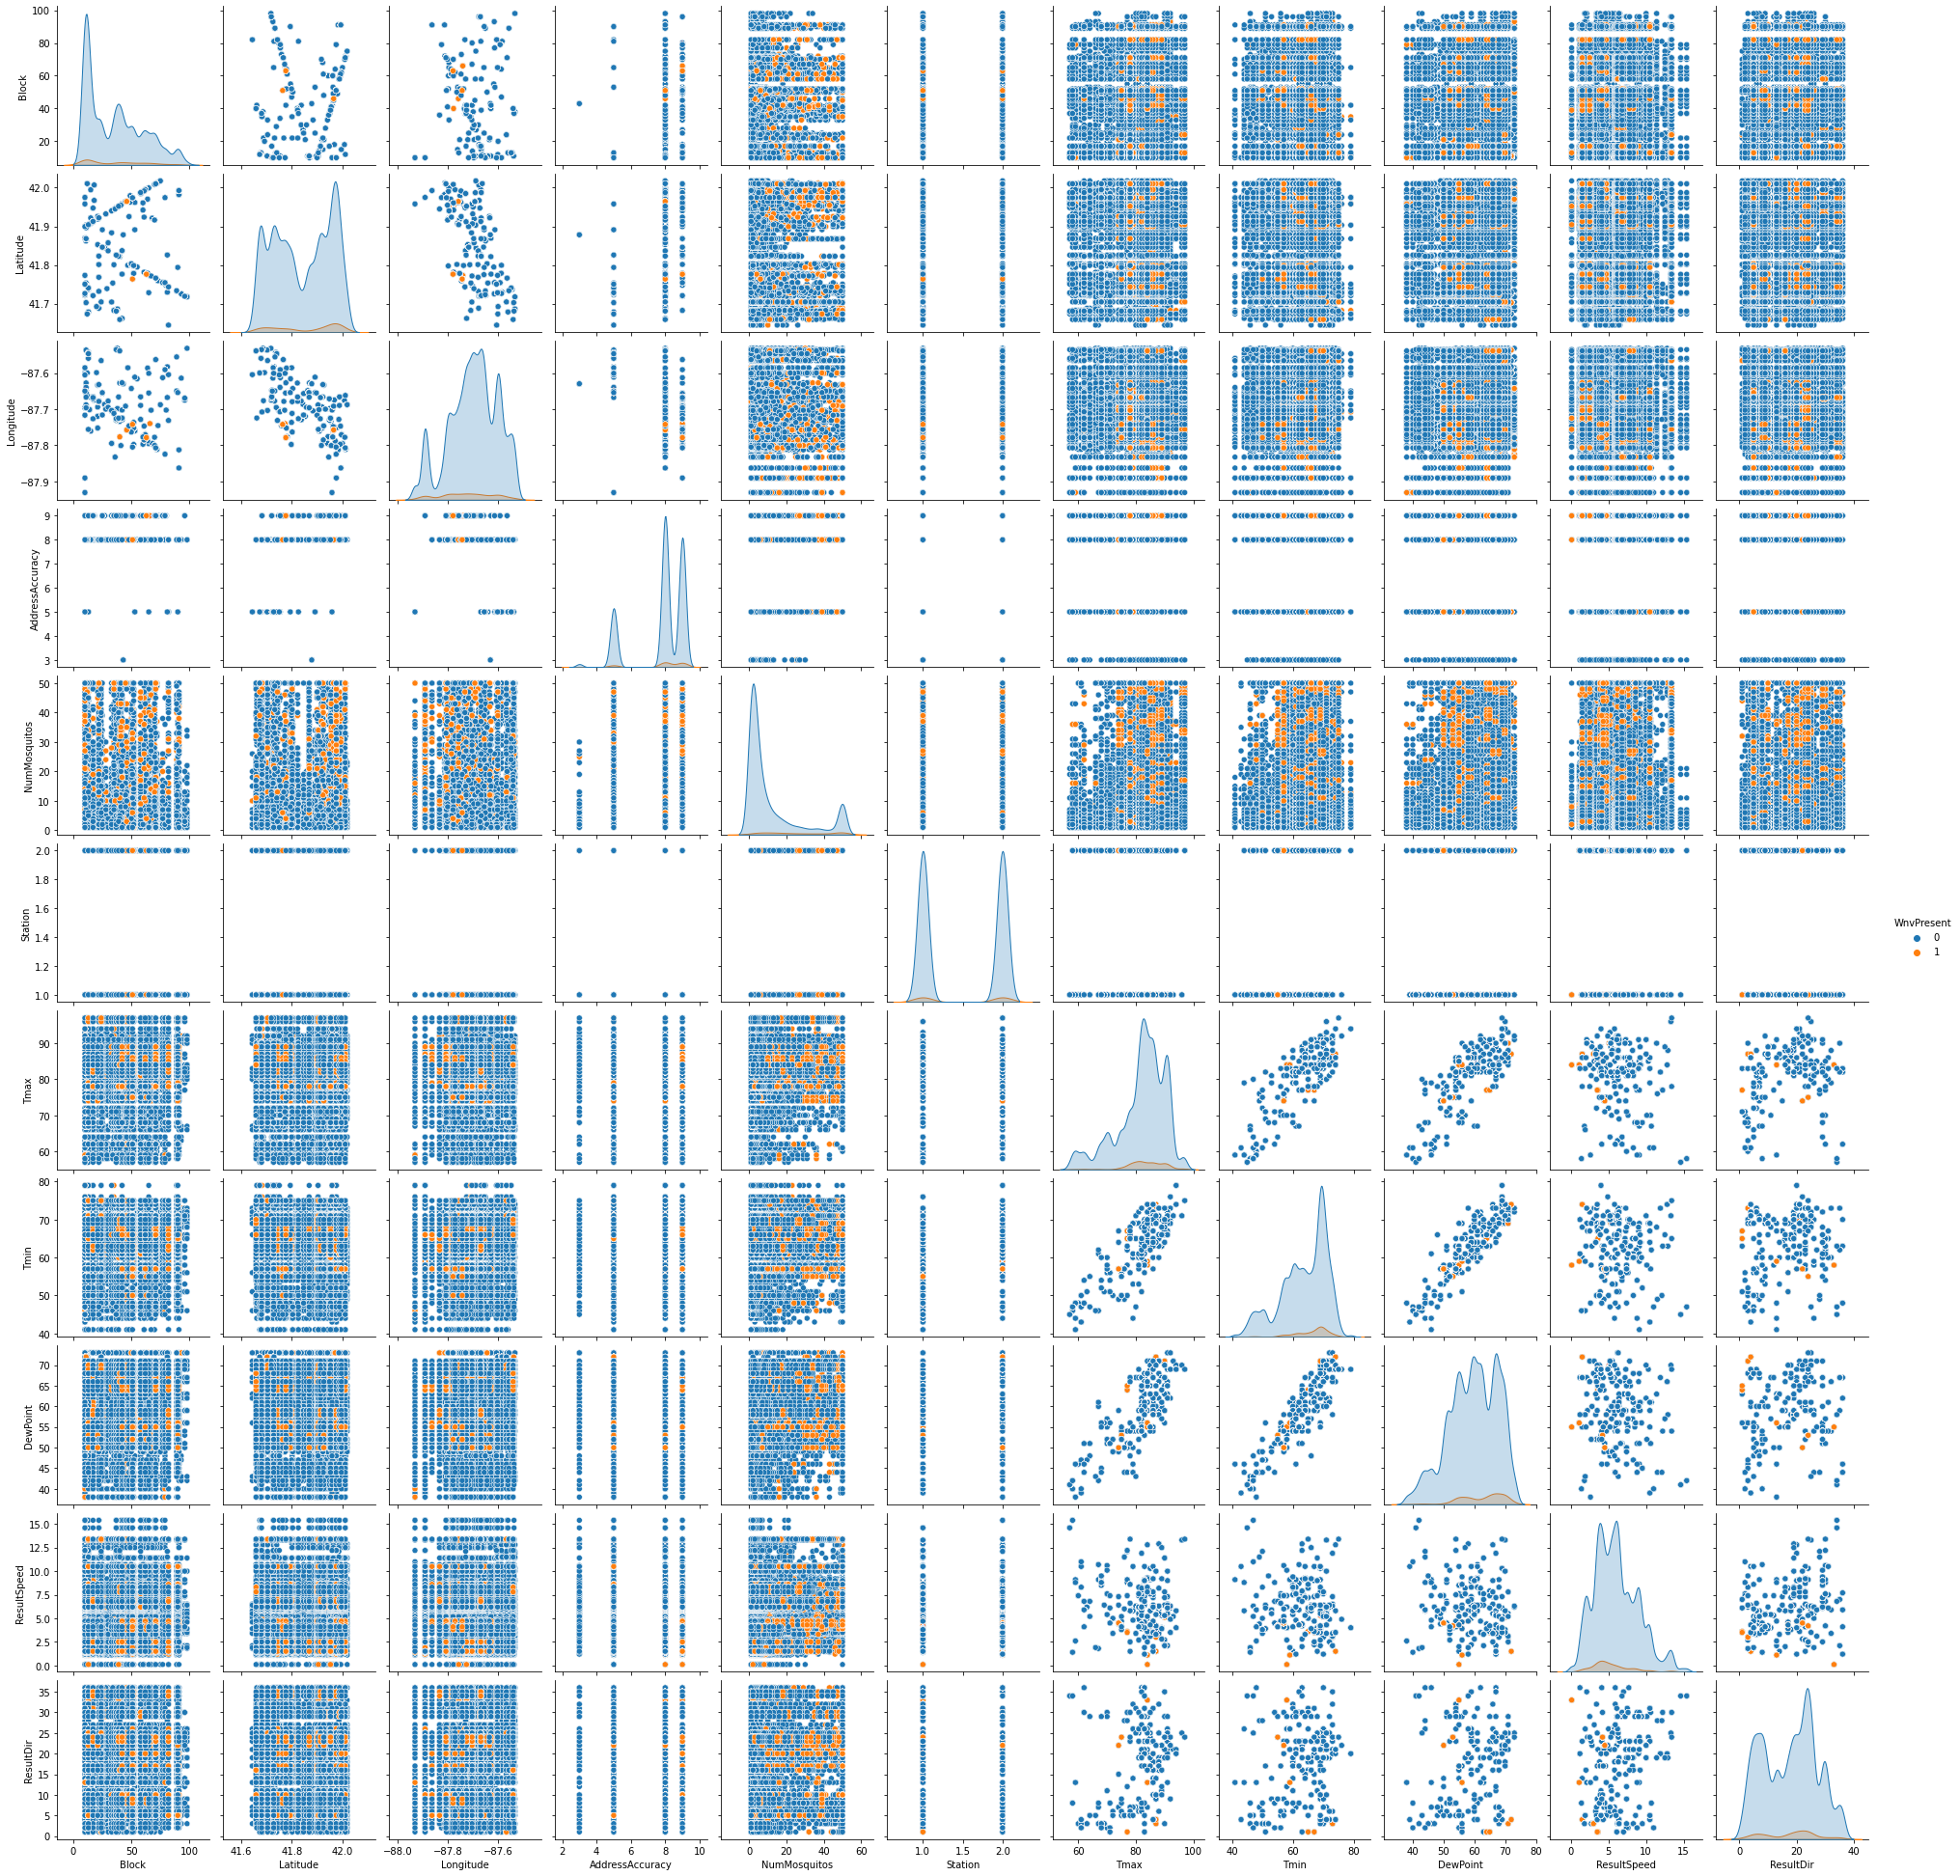

In [15]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=train, hue=dep_var)
plt.show()

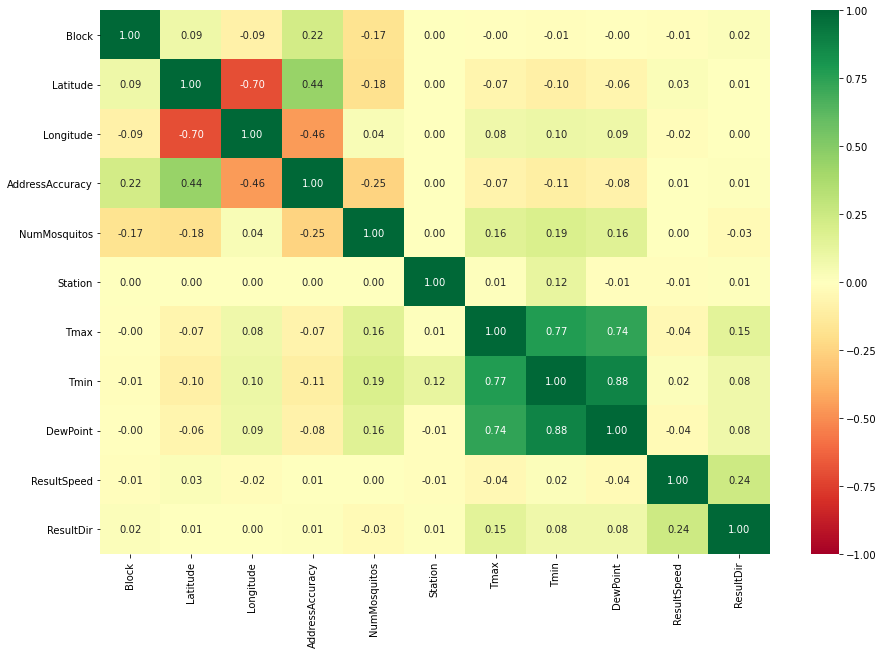

In [16]:
#Train dataset correlation plot
sns.heatmap(
    data=train.drop(dep_var, axis=1).corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn',
    vmin=-1,
    vmax=1
)

fig = plt.gcf()
fig.set_size_inches(15, 10)

plt.show()

## Data Preprocessing

### Handling dates

In [17]:
train = add_datepart(train, 'Date')
test = add_datepart(test, 'Date')
weather = add_datepart(weather, 'Date')
spray = add_datepart(spray, 'Date')

In [18]:
train.columns

Index(['Address', 'Species', 'Week', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'Year', 'Month',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start',
       'Elapsed'],
      dtype='object')

In [19]:
train[['Year', 'Month']].iloc[0], train[['Year', 'Month']].iloc[-1]

(Year     2007
 Month       5
 Name: 0, dtype: int64,
 Year     2013
 Month       9
 Name: 21011, dtype: int64)

In [20]:
weather[['Year', 'Month']].iloc[0], weather[['Year', 'Month']].iloc[-1]

(Year     2007
 Month       5
 Name: 0, dtype: int64,
 Year     2014
 Month      10
 Name: 2943, dtype: int64)

In [21]:
spray[['Year', 'Month']].iloc[0], spray[['Year', 'Month']].iloc[-1]

(Year     2011
 Month       8
 Name: 0, dtype: int64,
 Year     2013
 Month       9
 Name: 14834, dtype: int64)

In [22]:
test[['Year', 'Month']].iloc[0], test[['Year', 'Month']].iloc[-1]

(Year     2008
 Month       6
 Name: 0, dtype: int64,
 Year     2014
 Month      10
 Name: 232585, dtype: int64)

### TabularProcs and TabularPandas

In [23]:
procs = [Categorify, FillMissing]

In [24]:
# In case needed to split in training and validation

# cond = (df.Year<2011) | (df.Month<10)
# train_idx = np.where( cond)[0]
# valid_idx = np.where(~cond)[0]

# splits = (list(train_idx),list(valid_idx))
splits = None

In [27]:
# Splitting columns into categorical and continous based on cardinality of data
cont_train,cat_train = cont_cat_split(train, 1, dep_var=dep_var)
cont_test,cat_test = cont_cat_split(test, 1, dep_var=None)

In [28]:
train_to = TabularPandas(train, procs, cat_train, cont_train, y_names=dep_var, splits=splits)
test_to = TabularPandas(test, procs, cat_test, cont_test, splits=splits)

In [29]:
train_to.show(3)

,Address,Species,Week,Street,Trap,AddressNumberAndStreet,Tavg,Depart,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir,Year,Month,Day,Dayofweek,Dayofyear,WnvPresent
0,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,22,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",74,10,65,0,9,0421,1917,BR HZ,0,M,0.0,0.00,29.39,30.11,6.5,False,False,False,False,False,False,1180396800,41,41.954689,-87.800987,9,1,1,88,60,58,5.8,18,2007,5,29,1,149,0
1,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX PIPIENS/RESTUANS,22,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",77,M,66,0,12,-,-,BR HZ,M,M,M,0.00,29.44,30.09,7.4,False,False,False,False,False,False,1180396800,41,41.954689,-87.800987,9,1,2,88,65,59,5.8,16,2007,5,29,1,149,0
2,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",CULEX RESTUANS,22,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",74,10,65,0,9,0421,1917,BR HZ,0,M,0.0,0.00,29.39,30.11,6.5,False,False,False,False,False,False,1180396800,41,41.954689,-87.800987,9,1,1,88,60,58,5.8,18,2007,5,29,1,149,0


In [30]:
# To view the effect of Categorify
train_to.items.head(3)

,Address,Species,Week,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,61,3,1,41,33,2,73,41.954689,-87.800987,9,...,29,1,149,1,1,1,1,1,1,1
1,61,3,1,41,33,2,73,41.954689,-87.800987,9,...,29,1,149,1,1,1,1,1,1,1
2,61,4,1,41,33,2,73,41.954689,-87.800987,9,...,29,1,149,1,1,1,1,1,1,1


In [33]:
test_to.show(3)

,Address,Week,Species,Street,Trap,AddressNumberAndStreet,Tavg,Depart,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,Id,Block,Latitude,Longitude,AddressAccuracy,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir,Year,Month,Day,Dayofweek,Dayofyear
0,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",24,CULEX PIPIENS/RESTUANS,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",74,7,64,0,9,0416,1926,,0,M,0.0,0.00,29.28,29.99,10.0,False,False,False,False,False,False,1213142400,1,41,41.954689,-87.800987,9,1,86,61,56,8.9,18,2008,6,11,2,163
1,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",24,CULEX PIPIENS/RESTUANS,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",76,M,64,0,11,-,-,,M,M,M,0.00,29.34,29.97,10.4,False,False,False,False,False,False,1213142400,1,41,41.954689,-87.800987,9,2,86,66,55,9.4,18,2008,6,11,2,163
2,"4100 North Oak Park Avenue, Chicago, IL 60634, USA",24,CULEX RESTUANS,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",74,7,64,0,9,0416,1926,,0,M,0.0,0.00,29.28,29.99,10.0,False,False,False,False,False,False,1213142400,2,41,41.954689,-87.800987,9,1,86,61,56,8.9,18,2008,6,11,2,163


In [38]:
train_xs, train_y = train_to.train.xs,train_to.train.y
test_xs = test_to.train.xs

## Random Forest Classifier

In [40]:
def rf(xs, y, n_estimators=40, max_samples=21012,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [43]:
m = rf(train_xs, train_y)